In [16]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
np.random.seed(19680801)
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue","blue"])
cmap_bold = ["darkorange", "c", "darkblue",'red']

In [17]:
def_frame_sucesso =  pd.read_csv("taxa_sucesso.csv",sep=',')
def_frame_sucesso = def_frame_sucesso.sort_values(['sigla'])

In [18]:
def_frame_sucesso_pos_2022= def_frame_sucesso[def_frame_sucesso['ano_base']==2022][['sigla','tsg','TSPG']]

In [19]:
X = def_frame_sucesso_pos_2022[['tsg','TSPG']].to_numpy() * 100
X=X.astype(int)

In [20]:
y = def_frame_sucesso_pos_2022['sigla'].to_list()

In [21]:
est= KMeans(n_clusters=8, n_init="auto")

est.fit(X)
labels = est.labels_
color = cm.Set3(range(0,8))
print(color)

[[0.55294118 0.82745098 0.78039216 1.        ]
 [1.         1.         0.70196078 1.        ]
 [0.74509804 0.72941176 0.85490196 1.        ]
 [0.98431373 0.50196078 0.44705882 1.        ]
 [0.50196078 0.69411765 0.82745098 1.        ]
 [0.99215686 0.70588235 0.38431373 1.        ]
 [0.70196078 0.87058824 0.41176471 1.        ]
 [0.98823529 0.80392157 0.89803922 1.        ]]


C:\Users\rafael.viana\AppData\Local\r-miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\rafael.viana\AppData\Local\Temp\ipykernel_15356\2851457221.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(position[0],position[1],c=color[group],label= 'GRUPO: '+str(group) +' INDEX: '+str(i)+' '+ name,s=200,alpha=1)


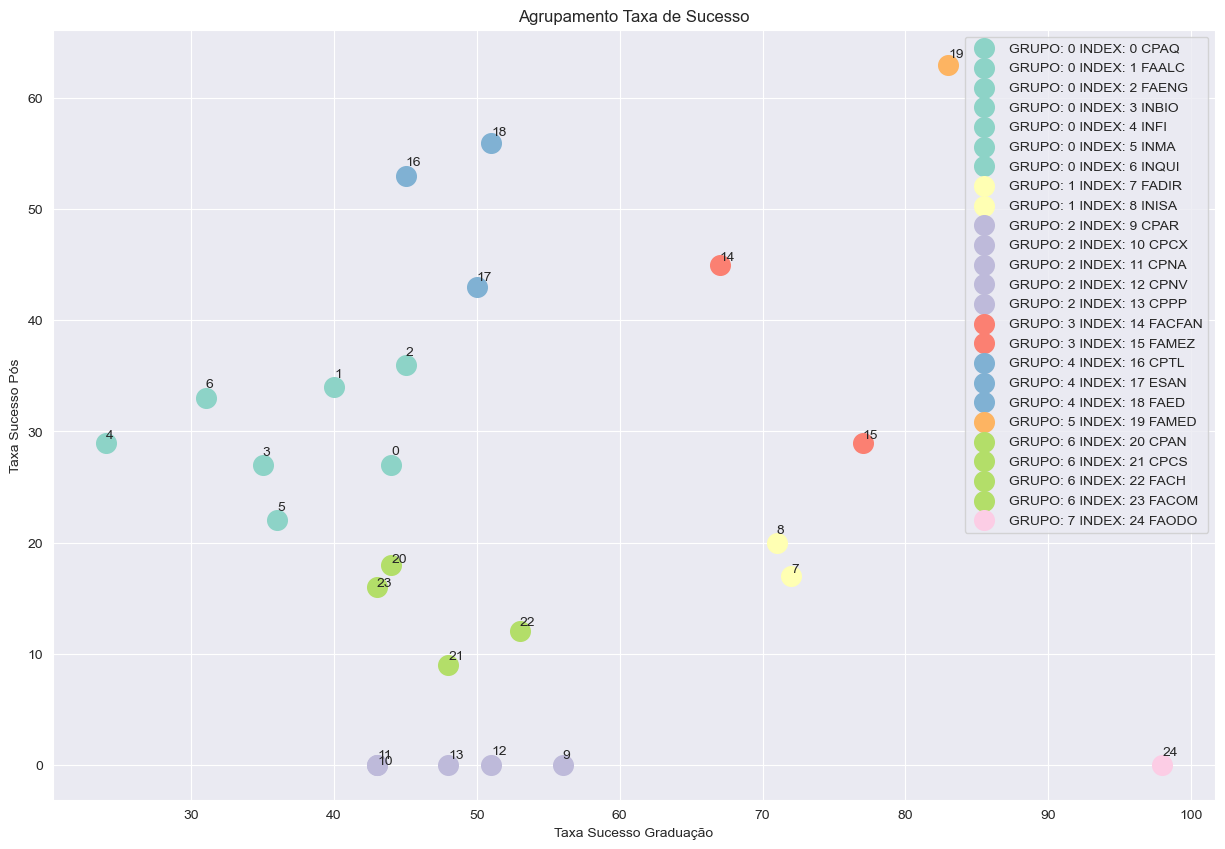

In [51]:
fig,ax = plt.subplots(figsize=(15,10))

res = { y[cat] : [labels[cat],X[cat]] for cat in range(0,len(labels))}
res=dict(sorted(res.items(), key=lambda x:x[1][0]))
# print(res)

# res_x = { y[cat] : X[cat] for cat in range(0,len(labels))}
# res_x=dict(sorted(res_x.items(), key=lambda x:x[1][0]))
# print(res_x)
#
# res_number = {list(res.keys())[cat] : cat for cat in range(0,len(labels))}
# res_number=dict(sorted(res_number.items(), key=lambda x:x[1]))
# print(res_number)
i=0
for name in res:
    group=res[name][0]
    position=res[name][1]
    ax.scatter(position[0],position[1],c=color[group],label= 'GRUPO: '+str(group) +' INDEX: '+str(i)+' '+ name,s=200,alpha=1)
    scale = 1 * np.random.rand(1)
    ax.annotate(i,(position[0],position[1]+scale))
    i+=1
ax.set_xlabel("Taxa Sucesso Graduação")
ax.set_ylabel("Taxa Sucesso Pós")
ax.set_title("Agrupamento Taxa de Sucesso")
ax.legend()

In [ ]:
list(labels)
